In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer

In [3]:
df=pd.read_csv('Train.csv')
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


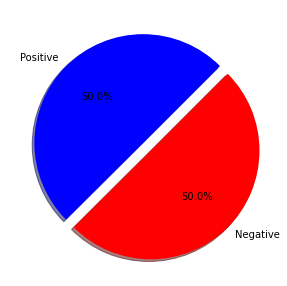

In [7]:
fig=plt.figure(figsize=(5,5))
colors=['blue','red']
pos = df[df['label']==1]
neg = df[df['label']==0]
ck = [pos['label'].count(),neg['label'].count()]
legpie = plt.pie(ck,labels=['Positive','Negative'],
                autopct = '%1.1f%%',
                shadow = True,
                colors = colors,
                startangle = 45,
                explode=(0, 0.1))

In [14]:
import re
def preprocessor(text):
             text=re.sub('<[^>]*>','',text)
             emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
             text=re.sub('[\W]+',' ',text.lower()) +\
                ' '.join(emojis).replace('-','')
             return text   
df['text']=df['text'].apply(preprocessor)

### Now, I’ll be using nltk’s PorterStemmer to simplify the data and remove unnecessary complexities in our text data:

In [16]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
def tokenizer(text):
    return text.split()
def tokenizer_porter(text):
    return[porter.stem(word) for word in text.split()]

# Visualizing Negative and Positive Words
### To visualzie the negative and postive words using a wordcloud, I will first remove the stopwords:

In [21]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhijit.n\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
from wordcloud import WordCloud

positivedata = df[df['label']==1]
positivedata = positivedata['text']
negdata = df[df['label']==0]
negdata=negdata['text']

ModuleNotFoundError: No module named 'wordcloud'